# HR Analytics Demo

<h4>Setup</h4>

 Import libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Is there a relation between Attrition and Age, Monthly Income, Number of years in the company?

I have taken the below fictional data set created by IBM data scientists in order to do a quick analysis between attrition and the following 3 factors: age, monthly income and number of years in the company.

Dataset taken from: https://www.kaggle.com/faressayah/ibm-hr-analytics-employee-attrition-performance

In [36]:
# Read csv, load into a dataframe and display
import pandas as pd
import numpy as np

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
# Keeping only relevant columns for the analysis
df2 = df[['Attrition','Age','MonthlyIncome','YearsAtCompany']]
df2.head()

,Attrition,Age,MonthlyIncome,YearsAtCompany
0,Yes,41,5993,6
1,No,49,5130,10
2,Yes,37,2090,0
3,No,33,2909,8
4,No,27,3468,2


In [40]:
#Describe dataset
df2.describe()

,Age,MonthlyIncome,YearsAtCompany
count,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,7.008163
std,9.135373,4707.956783,6.126525
min,18.000000,1009.000000,0.000000
25%,30.000000,2911.000000,3.000000
50%,36.000000,4919.000000,5.000000
75%,43.000000,8379.000000,9.000000
max,60.000000,19999.000000,40.000000


In [49]:
# List columns that are measures and exclude the attrition column
col = []
for column in df2.columns:
    col.append(column)
col.remove('Attrition')

In [50]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


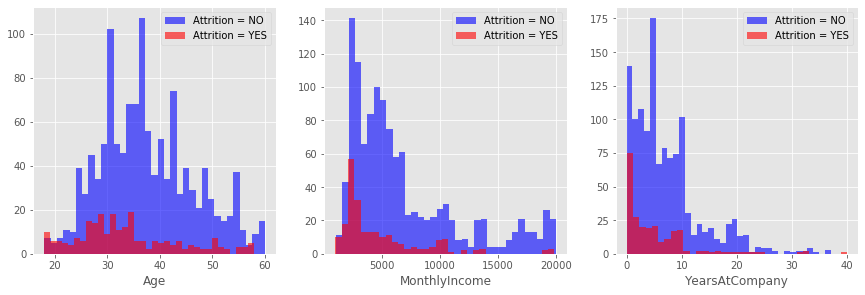

In [54]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 'No'][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 'Yes'][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

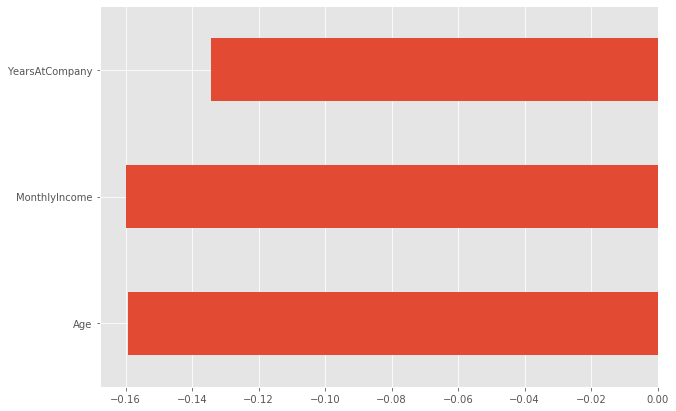

In [59]:
df2.drop('Attrition', axis=1).corrwith(df2.Attrition).plot(kind='barh', figsize=(10, 7))







## 2. Building a simple model for the relation between the number of years and the monthly income

<h3>Linear Regression</h3>

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
# Create relevant Dataframe for the study
df3 = df[['YearsAtCompany','MonthlyIncome']]
X = df[['YearsAtCompany']]
Y = df['MonthlyIncome']

In [92]:
# Fit the linear model
lm.fit(X,Y)

#Create a prediction
Yhat=lm.predict(X)
Yhat[0:5] 

array([6104.50056353, 7685.31884047, 3733.27314813, 6894.909702  ,
       4523.6822866 ])

In [93]:
# Calculate the intercept
lm.intercept_

3733.2731481323835

In [94]:
#Calculate the coeficient
lm.coef_

array([395.20456923])

<b>Monthly Income</b> = -2970.67 + 256.57 x  <b>Age</b>

(0, 22637.53948953579)

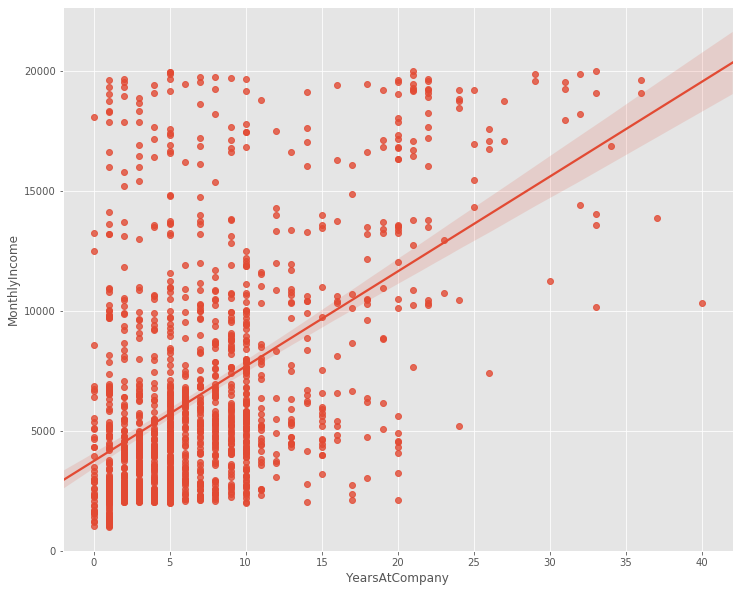

In [95]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="YearsAtCompany", y="MonthlyIncome", data=df3)
plt.ylim(0,)

In [96]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.2644888819794246


In [97]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [6104.50056353 7685.31884047 3733.27314813 6894.909702  ]


In [99]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df3['YearsAtCompany'], Yhat)
print('The mean square error of number of years in a company and predicted value is: ', mse)

The mean square error of number of years in a company and predicted value is:  48025777.79714997


<h3>Polynomial Regression</h3>

In [110]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 35, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Years At Company ~ Monthly Income')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('YearsAtCompany')
    plt.ylabel('Monthly Income')

    plt.show()
    plt.close()

In [111]:
x = df['YearsAtCompany']
y = df['MonthlyIncome']

In [114]:
# Here we use a polynomial of the 11th order
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9             8            7
-2.151e-10 x  + 4.763e-08 x  - 4.369e-06 x + 0.0002129 x - 0.005808 x
            6          5         4         3         2
 + 0.08236 x - 0.3381 x - 5.718 x + 80.21 x - 364.7 x + 853.3 x + 4123


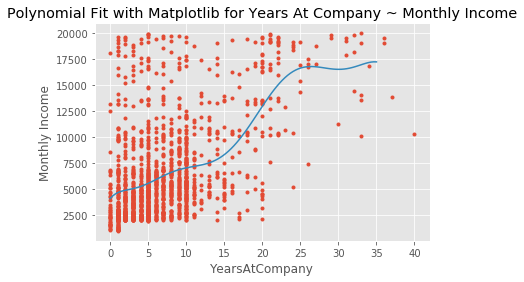

In [115]:
PlotPolly(p, x, y, 'YearsAtCompany')

In [116]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.2887289471818383


In [117]:
mean_squared_error(df3['YearsAtCompany'], p(x))

48562689.88250394

<h3>Decision Making</h3>

<p>Simple Linear Regression: Using number of years spend in a company as a Predictor Variable of Monthly Income.
<ul>
    <li>R-squared: 0.2644888819794246</li>
    <li>MSE: 4.80 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using number of years spend in a company as a Predictor Variable of Monthly Income.
<ul>
    <li>R-squared: 0.2887289471818383</li>
    <li>MSE: 4.85 x 10^7</li>
</ul>
</p>